# In-Depth Analysis Notebook
In this notebook I will be completing the final programming work for my first Springboard capstone project. The goal of this project is to write an algorithm that will predict which decade a song is from given the lyrics of the song.

So far in the project I have cleaned the data and created a dataframe of tf-idf values for the lyrics of each song. These tf-idf values will be the source of the features for the predictive model. The first task to be tackled in this notebook will be to write a few classifiers and analyze their results, I plan on looking at writing the following classifiers:
- Support vector machines
- Random forest
- XGBoost

I plan on analyzing the results of these classifiers in depth and comparing the reults of these models to each other in order to determine which of these is the best classifier for this problem given the feature set that we have.

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
#importing data and presenting the heads of the source data and tf-idf data to provide context
songs = pd.read_csv('basedata.csv')
songs = songs.drop('Unnamed: 0', axis=1)
tfdata = pd.read_csv('tfdata.csv')
tfdata = tfdata.drop('Unnamed: 0', axis=1)

In [3]:
# displaying the original data
songs.head()

,Rank,Song,Artist,Year,Lyrics,Decade,Tokens
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,1960,"['sam', 'sham', 'miscellaneous', 'wooly', 'bul..."
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1960,"['sugar', 'pie', 'honey', 'bunch', 'know', 'lo..."
2,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1960,"['woke', 'morning', 'mind', 'mind', 'got', 'tr..."
3,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1960,"['never', 'close', 'eyes', 'anymore', 'kiss', ..."
4,6,downtown,petula clark,1965,when youre alone and life is making you lonel...,1960,"['alone', 'life', 'making', 'lonely', 'always'..."


In [4]:
# displaying the tf-idf data
tfdata.head()

,able,accept,aching,across,act,actin,acting,action,add,addicted,...,yesterday,yet,yo,york,young,younger,yup,zero,zone,Decade
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960


# Out of the Box Models
In the next section I am going to observe the results of the classifiers out of the box on the 'raw' tf-idf data. I will use the results of these models as a baseline to work from in looking at tuning these models into the best classifiers possible.

# Support Vector Machine Classifier
The following code will be the initial SVM classifier on the tf-idf data that I have. 

In [3]:
#importing more packges
from sklearn import svm
from sklearn.model_selection import train_test_split

In [4]:
# setting up data
feats = tfdata.drop('Decade', axis=1).fillna(0)
labs = tfdata.Decade

In [7]:
# creating testing and training data
Xtr, Xte, ytr, yte = train_test_split(feats, labs, test_size = 0.2, random_state=5)

In [8]:
#instantiating the SVM
clf = svm.SVC(gamma='auto', random_state=5)

In [9]:
#out of the box performance of the svm
fit = clf.fit(Xtr, ytr)

In [10]:
fit.score(Xtr, ytr)

0.20257731958762887

In [11]:
fit.score(Xte, yte)

0.19361483007209063

Observing our results here, the out of the box SVM has a slightly better than random chance on its own training data, as well as a similar, but slightly worse performance on the testing data. This SVM is heavy on computational time and does not seem like it can provide a great classifier currently. We will come back to this later.

# Random Forest Classifier
Now, I will look at creating a random forest classifier.

In [5]:
#importing the random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [13]:
# instantiating the classifier
rfc = RandomForestClassifier(random_state=5)

In [14]:
fit_rfc = rfc.fit(Xtr, ytr)

D:\Ana\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [15]:
fit_rfc.score(Xtr, ytr)

0.9850515463917526

In [16]:
fit_rfc.score(Xte, yte)

0.3274974253347065

Well, the out of the box random forest is significantly better than the out of the box SVM. The model trained quickly and was quite a bit better at classifying the testing data. These results are still not ipressive, but I think this may be promising as a model to tune in the future. 

# XGBoost Classifier
Now I will observe the results of an out of the box XGBoost classifier.

In [6]:
#Importing XGBoost
import xgboost as xgb

In [18]:
XGC = xgb.XGBClassifier()

In [19]:
fitX = XGC.fit(Xtr, ytr)

In [20]:
trpredX = fitX.predict(Xtr)

In [21]:
acc = sum(trpredX == ytr)/len(ytr)
acc

0.6971649484536082

In [22]:
predX = fitX.predict(Xte)

In [23]:
accuracy = sum(predX == yte)/len(predX)
accuracy

0.37590113285272914

The results of the out of the box XGBoost are quite interesting to me. The calssifier does not perform as well on the training data as the random forest model, but it performs better on the testing data. This model performed best out of the box, so it may end up being the best choice of model after some further observations and parameter tuning.

# Starting PCA
I have not done any PCA on this data before starting this document, so the first goal will be to apply PCA to the tf-idf data and try to determine what number of principal components to use as the features of the predictive model.

In [7]:
# pulling out features
feats = tfdata.drop('Decade', axis=1)
feats = feats.fillna(0)

In [25]:
#instantiating pca model, fitting and tranforming it
#setting random state for reproducibility
pca = PCA(random_state=5)
comps = pca.fit_transform(feats)

Text(0.5, 1.0, 'Explained variance of first 20 components')

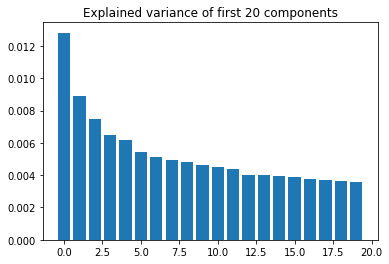

In [26]:
plt.bar(range(0,20),pca.explained_variance_ratio_[:20])
plt.title('Explained variance of first 20 components')

In [27]:
sum_var = [pca.explained_variance_[0]]
i=0
for val in pca.explained_variance_[1:]:
    sum_var.append(sum_var[i]+val)
    i += 1

Text(0, 0.5, 'Cumulative Explained Variance')

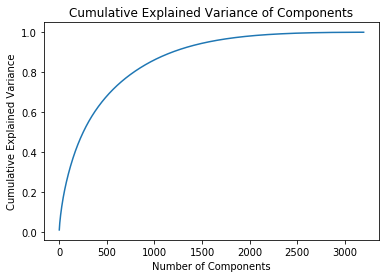

In [28]:
plt.plot(range(0, 3199), np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative Explained Variance of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

Observing the results of the primary component analysis, it seems that a maximium number of primary components contains approximately 70% of the explaine variance in the data. That value seems to flatten out around 2000. I would now like to re-run our out of the box models on primary component numbers of 1000, 1500, and 2000, to see if the primary components are able to inform our classifiesrs better.

# Returning to models
I will now run through the out of the box models that we looked at before, calculating accuracy scores for each of the models again, and checking to see what peforemance we get from each model based on a number of primary components. 

In [8]:
# writing a function to partially automate scoring testing
def pca_split_scores(features, feature_nums, targets, model):
    '''Takes a set of features, a list of numbers of features, and a model, and returns accuracy scores for each.'''
    scores = []
    for n in feature_nums:
        feats = features[:,:n]
        Xtr, Xte, ytr, yte = train_test_split(feats, targets, test_size=0.2, random_state=5)
        clf = model
        fit = clf.fit(Xtr, ytr)
        train_score = fit.score(Xtr, ytr)
        test_score = fit.score(Xte, yte)
        score_statement = 'For n = ' + str(n) +' primary components: Training accuracy = ' + str(round(train_score, 3)) + ' Testing accuracy = ' + str(round(test_score, 3))
        scores.append(score_statement)
    return scores

In [30]:
nums = [1000, 1500, 2000]

In [31]:
mod = svm.SVC(gamma='auto', random_state=5)

In [32]:
svm_scores = pca_split_scores(comps, nums, labs, mod)

In [33]:
print(svm_scores)

['For n = 1000 primary components: Training accuracy = 0.203 Testing accuracy = 0.194', 'For n = 1500 primary components: Training accuracy = 0.203 Testing accuracy = 0.194', 'For n = 2000 primary components: Training accuracy = 0.203 Testing accuracy = 0.194']


In [34]:
rf_mod = RandomForestClassifier(random_state=5)

In [35]:
rf_scores = pca_split_scores(comps, nums, labs, rf_mod)

D:\Ana\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [36]:
rf_scores

['For n = 1000 primary components: Training accuracy = 0.985 Testing accuracy = 0.267',
 'For n = 1500 primary components: Training accuracy = 0.989 Testing accuracy = 0.238',
 'For n = 2000 primary components: Training accuracy = 0.988 Testing accuracy = 0.251']

In [9]:
def pca_xgb_scores(features, feature_nums, targets, model):
    '''Takes a set of features, a list of numbers of features, and a model, and returns accuracy scores for each.'''
    scores = []
    for n in feature_nums:
        feats = features[:,:n]
        Xtr, Xte, ytr, yte = train_test_split(feats, targets, test_size=0.2, random_state=5)
        clf = model
        fit = clf.fit(Xtr, ytr)
        tr_pred = fit.predict(Xtr)
        te_pred = fit.predict(Xte)
        train_score = sum(tr_pred == ytr) / len(ytr)
        test_score = sum(te_pred == yte) / len(yte)
        score_statement = 'For n = ' + str(n) +' primary components: Training accuracy = ' + str(round(train_score, 3)) + ' Testing accuracy = ' + str(round(test_score, 3))
        scores.append(score_statement)
    return scores

In [38]:
XG_mod = xgb.XGBClassifier(random_state=5)

In [39]:
xg_scores = pca_xgb_scores(comps, nums, labs, XG_mod)

In [40]:
xg_scores

['For n = 1000 primary components: Training accuracy = 0.871 Testing accuracy = 0.344',
 'For n = 1500 primary components: Training accuracy = 0.89 Testing accuracy = 0.353',
 'For n = 2000 primary components: Training accuracy = 0.897 Testing accuracy = 0.346']

# What to do next?
PCA has not improved model performance and XGBoost is consistently our best estimator in terms of classification. Moving forward XGBoost will be the only model we look at for classifiaction, to reign in the scope of the project. I will now attempt to normalize my raw data and observe how the XGBoost model works with that data. I will then perform PCA again in hopes that it may give a better result this time.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
feats = tfdata.drop('Decade', axis=1).fillna(0)

In [12]:
scaler = StandardScaler()

In [13]:
scaled = scaler.fit_transform(feats)

In [45]:
Xtr, Xte, ytr, yte = train_test_split(scaled, labs, test_size=0.2, random_state=5)

In [14]:
XGC = xgb.XGBClassifier(random_state=5)

In [47]:
fitted = XGC.fit(Xtr, ytr)

In [48]:
predstr= fitted.predict(Xtr)

In [49]:
score = sum(predstr==ytr)/len(ytr)
score

0.6971649484536082

In [50]:
preds = fitted.predict(Xte)

In [51]:
score = sum(preds == yte)/len(yte)
score

0.37590113285272914

In [52]:
pca = PCA(random_state=5)

In [53]:
fit = pca.fit(scaled)

Text(0, 0.5, 'Cumulative Explained Variance')

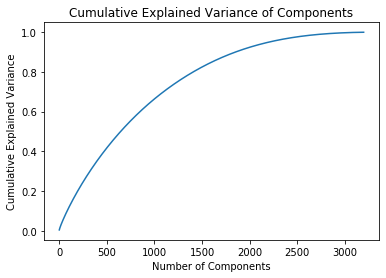

In [54]:
plt.plot(range(0, 3199), np.cumsum(fit.explained_variance_ratio_))
plt.title('Cumulative Explained Variance of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [55]:
trans = fit.transform(scaled)

In [56]:
nums = [2000, 2500, 3000]

In [57]:
scrs = pca_xgb_scores(trans, nums, labs, XGC)

In [58]:
scrs

['For n = 2000 primary components: Training accuracy = 0.888 Testing accuracy = 0.373',
 'For n = 2500 primary components: Training accuracy = 0.904 Testing accuracy = 0.367',
 'For n = 3000 primary components: Training accuracy = 0.915 Testing accuracy = 0.35']

In [59]:
nums = [1000, 1500, 1750]

In [60]:
scrs = pca_xgb_scores(trans, nums, labs, XGC)

In [61]:
scrs

['For n = 1000 primary components: Training accuracy = 0.84 Testing accuracy = 0.371',
 'For n = 1500 primary components: Training accuracy = 0.863 Testing accuracy = 0.374',
 'For n = 1750 primary components: Training accuracy = 0.875 Testing accuracy = 0.375']

I will now try to find a best number of feautures by performing 5-fold cross validation on the XGBoosted model to find the best number of components for the model, I will modify my previous function slightly to do this.

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [63]:
n_comps = list(range(1500, 2000, 25))

In [64]:
scrs = pca_xgb_scores(trans, n_comps, labs, XGC)

In [65]:
scrs

['For n = 1500 primary components: Training accuracy = 0.863 Testing accuracy = 0.374',
 'For n = 1525 primary components: Training accuracy = 0.864 Testing accuracy = 0.372',
 'For n = 1550 primary components: Training accuracy = 0.863 Testing accuracy = 0.377',
 'For n = 1575 primary components: Training accuracy = 0.867 Testing accuracy = 0.382',
 'For n = 1600 primary components: Training accuracy = 0.869 Testing accuracy = 0.382',
 'For n = 1625 primary components: Training accuracy = 0.868 Testing accuracy = 0.371',
 'For n = 1650 primary components: Training accuracy = 0.872 Testing accuracy = 0.364',
 'For n = 1675 primary components: Training accuracy = 0.874 Testing accuracy = 0.377',
 'For n = 1700 primary components: Training accuracy = 0.872 Testing accuracy = 0.382',
 'For n = 1725 primary components: Training accuracy = 0.878 Testing accuracy = 0.375',
 'For n = 1750 primary components: Training accuracy = 0.875 Testing accuracy = 0.375',
 'For n = 1775 primary component

After looking for the best number of components in the range that it was expected to be in, I'm going to perform cross validation on the best performing models to get an idea for with one seems to be the most robust model, and that will be the model chosen for parameter tuning.

In [16]:
def pca_xgb_CV(features, feature_nums, targets, model):
    '''Takes a set of features, a list of numbers of features, and a model, and returns cv accuracy scores for each.'''
    scores = []
    for n in feature_nums:
        feats = features[:,:n]
        Xtr, Xte, ytr, yte = train_test_split(feats, targets, test_size=0.2, random_state=5)
        clf = model
        kfold =KFold(n_splits=5, random_state=5)
        tr_results = cross_val_score(clf, Xtr, ytr, cv=kfold)
        te_results = cross_val_score(clf, Xte, yte, cv=kfold)
        score_statement = 'For n = ' + str(n) +' primary components: Training accuracy = ' + str(round(np.mean(tr_results), 3)) +'std: '+ str(round(np.std(tr_results), 3))+ ' Testing accuracy = ' + str(round(np.mean(te_results),3)) + 'std: ' + str(round(np.std(te_results),3)) 
        scores.append(score_statement)
    return scores

In [67]:
best_comps =[1575, 1600, 1700, 1800]

In [68]:
cv_scores = pca_xgb_CV(trans, best_comps, labs, XGC)

In [69]:
cv_scores

['For n = 1575 primary components: Training accuracy = 0.357std: 0.009 Testing accuracy = 0.286std: 0.026',
 'For n = 1600 primary components: Training accuracy = 0.353std: 0.015 Testing accuracy = 0.287std: 0.029',
 'For n = 1700 primary components: Training accuracy = 0.359std: 0.007 Testing accuracy = 0.291std: 0.015',
 'For n = 1800 primary components: Training accuracy = 0.361std: 0.01 Testing accuracy = 0.291std: 0.028']

I am going to choose to use n=1700 for the number of components of the model, as it maintained the best testing accuracy while also having a lower standard deviation in testing accuracy. The following code will be the parameter tuning for the model, I will begin to test for the optimum parameters for the model to get the best accuracy out of the model.

In [17]:
from sklearn.model_selection import RandomizedSearchCV

I'm going to start out by finding an optimum number of estimators to use for tuning the tree parameters of the model.

In [71]:
# set up test and training data for 1700 components
Xtr, Xte, ytr, yte = train_test_split(trans[:,:1700], labs, test_size=0.2, random_state=5)

In [72]:
param_dict = {'n_estimators': list(range(100, 500, 25))}

In [73]:
# Set up a more defaul XGBoost model to find a good number of estimators
xgb1 = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colample_bytree=0.8, seed=5)

In [74]:
rs1 = RandomizedSearchCV(xgb1, param_dict, scoring='neg_log_loss', iid=False, n_jobs=4, cv=5)

In [75]:
fit1 = rs1.fit(Xtr, ytr)

In [80]:
fit1.cv_results_

{'mean_fit_time': array([ 748.94021716,  432.39421487,  361.66570363,  502.19039764,
         871.326194  ,  680.85013676,  954.31054497, 1065.84761558,
        1031.69835625,  609.85430536]),
 'std_fit_time': array([ 1.53669859,  1.39758455,  0.86942278,  1.67612653,  5.24362703,
         7.32425636,  8.57949731,  7.2107703 ,  7.63831975, 36.6411307 ]),
 'mean_score_time': array([0.11669192, 0.07850285, 0.06821609, 0.086553  , 0.13013721,
        0.10993223, 0.14638386, 0.16403756, 0.15957394, 0.09385633]),
 'std_score_time': array([0.00501333, 0.00240028, 0.00241271, 0.00460602, 0.00418022,
        0.00649062, 0.00697525, 0.00319868, 0.006234  , 0.00658392]),
 'param_n_estimators': masked_array(data=[275, 150, 125, 175, 325, 250, 375, 425, 400, 225],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 275},
  {'n_estimators': 150},
  {'n_estimato

In [93]:
fit1.best_params_

{'n_estimators': 125}

best ns= 125, 150, 175, 225

In [94]:
param_dict2 = {'n_estimators': list(range(75, 175, 25))}

In [95]:
rs2 = RandomizedSearchCV(xgb1, param_dict2, scoring='neg_log_loss', iid=False, n_jobs=4, cv=5, n_iter=4)

In [96]:
fits2 = rs2.fit(Xtr, ytr)

D:\Ana\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [97]:
fits2.best_params_

{'n_estimators': 75}

In [ ]:
rs1 = RandomizedSearchCV(xgb1, param_dict, scoring='neg_log_loss', iid=False, n_jobs=4, cv=5)

In [106]:
xgb2 = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=75, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, seed=5)

In [99]:
fit2=xgb2.fit(Xtr, ytr)

In [100]:
trpred=fit2.predict(Xtr)

In [101]:
trscore= sum(trpred==ytr)/len(ytr)

In [102]:
tepred= fit2.predict(Xte)

In [103]:
tescore= sum(tepred==yte)/len(yte)

In [77]:
np.arange(0.8, 2, 0.1)

array([0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

In [90]:
trscore

0.9935567010309279

In [91]:
tescore

0.3779608650875386

In [104]:
trscore

0.9917525773195877

In [105]:
tescore

0.37590113285272914

In [110]:
xgb3 = xgb2 = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, seed=5)

In [109]:
from sklearn.model_selection import GridSearchCV

In [111]:
param_dict3 = {'n_estimators': list(range(55, 135, 10))}

In [112]:
rs3 = RandomizedSearchCV(xgb3, param_dict3, scoring='neg_log_loss', iid=False, n_jobs=4, cv=5)

In [113]:
fit3 = rs3.fit(Xtr, ytr)

D:\Ana\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [114]:
fit3.best_params_

{'n_estimators': 65}

In [115]:
fit3.cv_results_

{'mean_fit_time': array([121.99863048, 144.86478963, 166.57385936, 189.73457642,
        211.49901438, 234.88368087, 257.69695911, 272.24265242]),
 'std_fit_time': array([0.67707148, 0.32317766, 0.89765817, 1.10147313, 1.00809201,
        0.56488377, 1.1587345 , 8.62380901]),
 'mean_score_time': array([0.05266218, 0.05305266, 0.05275478, 0.05930924, 0.05964661,
        0.06044631, 0.06522985, 0.0663269 ]),
 'std_score_time': array([0.00553644, 0.00185536, 0.00249415, 0.00647259, 0.00537484,
        0.00279675, 0.00299444, 0.00675687]),
 'param_n_estimators': masked_array(data=[55, 65, 75, 85, 95, 105, 115, 125],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 55},
  {'n_estimators': 65},
  {'n_estimators': 75},
  {'n_estimators': 85},
  {'n_estimators': 95},
  {'n_estimators': 105},
  {'n_estimators': 115},
  {'n_estimators': 125}],
 'split0_test_score': array([-1.54994103, -1.

In [116]:
xgb4 = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=65, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, seed=5)

In [117]:
fit4=xgb4.fit(Xtr, ytr)

In [118]:
trpred=fit4.predict(Xtr)

trscore= sum(trpred==ytr)/len(ytr)

tepred= fit4.predict(Xte)

tescore= sum(tepred==yte)/len(yte)

In [119]:
trscore

0.9863402061855671

In [120]:
tescore

0.3583934088568486

In [122]:
xgb5 = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=125, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, seed=5)

In [123]:
# set up a parameter dicitonary for tuning model
param_dict4 = {'max_depth':[3, 4, 5, 6, 7, 8, 9, 10],'min_child_weight':np.arange(1, 7, 1)}

In [124]:
rs4 = RandomizedSearchCV(xgb5, param_dict4, scoring='neg_log_loss', iid=False, n_jobs=4, cv=5)

In [125]:
fit4 = rs4.fit(Xtr, ytr)

In [126]:
fit4.best_params_

{'min_child_weight': 4, 'max_depth': 4}

In [128]:
fit4.cv_results_

{'mean_fit_time': array([366.54279132, 218.25790801, 439.90834694, 266.98155465,
        271.30160236, 395.57519746, 215.60426865, 364.11919918,
        265.26243601, 148.14073105]),
 'std_fit_time': array([2.17981406, 2.30470597, 2.37287502, 2.46382441, 5.34173888,
        1.7790881 , 1.42493261, 2.12110706, 1.43142044, 5.45489154]),
 'mean_score_time': array([0.0815835 , 0.06482682, 0.094947  , 0.06841712, 0.06883249,
        0.08457432, 0.05844417, 0.08337712, 0.06622324, 0.04906888]),
 'std_score_time': array([0.00193175, 0.00356804, 0.01316168, 0.00448696, 0.00435638,
        0.00222098, 0.0041647 , 0.00448725, 0.00337347, 0.00429635]),
 'param_min_child_weight': masked_array(data=[3, 4, 1, 6, 4, 2, 1, 2, 2, 6],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[8, 4, 10, 5, 5, 9, 4, 8, 5, 3],
              mask=[False, False, False

In [129]:
trpred4 = fit4.predict(Xtr)

In [130]:
tepred4 = fit4.predict(Xte)

In [131]:
trscore4 = sum(trpred4==ytr)/len(ytr)
trscore4

0.9902061855670103

In [132]:
tescore4 = sum(tepred4==yte)/len(yte)
tescore4

0.3748712667353244

In [136]:
xgb5 = xgb.XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=125, min_child_weight=4, gamma=0, subsample=0.8, colsample_bytree=0.8, seed=5)

In [139]:
param_dict5 = {'gamma':[0, 0.1, 0.2, 0.3, 0.4]}

In [140]:
rs5 = RandomizedSearchCV(xgb5, param_dict5, scoring='neg_log_loss', iid=False, n_jobs=4, cv=5)

In [141]:
fit5 = rs5.fit(Xtr, ytr)

D:\Ana\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [142]:
fit5.cv_results_

{'mean_fit_time': array([214.25648422, 211.19923444, 209.2823494 , 210.93567219,
        206.09862542]),
 'std_fit_time': array([ 0.29576061,  1.85922405,  1.30962667,  2.22045137, 15.80253163]),
 'mean_score_time': array([0.06383038, 0.06023965, 0.05954309, 0.06003985, 0.05874114]),
 'std_score_time': array([0.0030254 , 0.00386783, 0.00405621, 0.00298512, 0.00534683]),
 'param_gamma': masked_array(data=[0, 0.1, 0.2, 0.3, 0.4],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'gamma': 0},
  {'gamma': 0.1},
  {'gamma': 0.2},
  {'gamma': 0.3},
  {'gamma': 0.4}],
 'split0_test_score': array([-1.52789644, -1.52371657, -1.52845068, -1.5349475 , -1.53219371]),
 'split1_test_score': array([-1.53183298, -1.5440006 , -1.5464117 , -1.54152465, -1.53016681]),
 'split2_test_score': array([-1.53063511, -1.52380701, -1.52416157, -1.51664705, -1.5329402 ]),
 'split3_test_score': array([-1.51535201, -1.52215889, -1.51583102, -1.51

In [143]:
trpred5 = fit5.predict(Xtr)

tepred5 = fit5.predict(Xte)

trscore5 = sum(trpred5==ytr)/len(ytr)
trscore5

tescore5 = sum(tepred5==yte)/len(yte)
tescore5

0.36560247167868176

In [146]:
trscore5

0.990979381443299

In [147]:
XGB_fullsearch = xgb.XGBClassifier(random_state=5)

In [150]:
full_cv_params = {'max_depth':[3, 4, 5, 6], 'min_child_weight':np.arange(1, 7, 1), 'n_estimators': list(range(75, 175, 25)),
                  'subsample':[i/100.0 for i in range(60,95,5)], 'colsample_bytree':[i/100.0 for i in range(60,95,5)],
                  'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}

In [152]:
rs_f = RandomizedSearchCV(XGB_fullsearch, full_cv_params, scoring='neg_log_loss', iid=False, n_jobs=4, cv=5, n_iter=25)

In [153]:
fit_f = rs_f.fit(Xtr, ytr)

In [154]:
rs_facc = RandomizedSearchCV(XGB_fullsearch, full_cv_params, scoring='accuracy', iid=False, n_jobs=4, cv=5, n_iter=25)

In [156]:
fit_facc = rs_facc.fit(Xtr, ytr)

In [162]:
telog_pred = fit_f.predict(Xte)

In [159]:
trlog_pred = fit_f.predict(Xtr)

In [160]:
#log-loss optimized training accuracy
log_tr = sum(trlog_pred==ytr)/len(ytr)
log_tr

0.9530927835051546

In [163]:
#log-loss optimized testing accuracy
log_te = sum(telog_pred==yte)/len(yte)
log_te

0.37384140061791965

In [164]:
# Accuracy optimized training and testing accuracy
tr_acc_pred = fit_facc.predict(Xtr)

In [165]:
te_acc_pred = fit_facc.predict(Xte)

In [168]:
acc_tr = sum(tr_acc_pred==ytr)/len(ytr)
acc_tr

0.9935567010309279

In [170]:
acc_te = sum(te_acc_pred==yte)/len(yte)
acc_te

0.35633367662203913

In [171]:
#log-loss optimized model
fit_f.best_params_

{'subsample': 0.7,
 'reg_alpha': 0.01,
 'n_estimators': 150,
 'min_child_weight': 6,
 'max_depth': 3,
 'colsample_bytree': 0.7}

In [172]:
#accuracy optimized model
fit_facc.best_params_

{'subsample': 0.85,
 'reg_alpha': 0.01,
 'n_estimators': 75,
 'min_child_weight': 4,
 'max_depth': 6,
 'colsample_bytree': 0.6}

In [173]:
fit_f.cv_results_

{'mean_fit_time': array([ 59.47685313, 242.11860657,  70.76237664, 201.61236401,
        302.8929585 , 186.88361058, 269.27182899, 162.17489252,
         48.87132378, 263.87487187, 137.66614985, 315.19118209,
         46.0424387 ,  81.71282239, 136.55811424, 226.07529631,
        128.75215726, 198.38194728, 166.02693696,  91.52870169,
         74.19412599, 260.0753521 , 284.95344043, 354.84692817,
        275.22540736]),
 'std_fit_time': array([1.13513313, 1.50623903, 0.88214862, 2.98519543, 2.47263049,
        1.89723779, 1.59123692, 1.29107098, 0.53638016, 1.47058434,
        0.82688334, 4.95723152, 0.4021793 , 0.63260568, 0.82132109,
        2.60953996, 2.35813072, 0.4797311 , 0.66240886, 0.68705511,
        1.11654148, 0.84512386, 1.76194601, 2.02605927, 6.55192666]),
 'mean_score_time': array([0.03909554, 0.06462779, 0.03610363, 0.06324286, 0.06878362,
        0.05465412, 0.06522565, 0.06053987, 0.03919415, 0.07060862,
        0.05126424, 0.07240696, 0.03570499, 0.04507933, 0.0560

In [174]:
fit_facc.cv_results_

{'mean_fit_time': array([ 72.72563119, 139.34924746,  46.5999537 , 232.19862947,
         64.88523679, 106.17146802, 318.609023  ,  95.05632367,
        260.62385569, 224.08359928, 201.09787316,  75.27783556,
        253.2367063 , 201.27394309, 215.12206583, 165.49740062,
         68.77943869, 276.89413033, 181.48787069, 249.71262088,
         81.77235317, 218.17613192,  59.95253453,  63.89559541,
         69.31572685]),
 'std_fit_time': array([0.86569907, 1.15084638, 0.45006023, 0.87906881, 0.7300949 ,
        0.98279175, 3.53690093, 1.67427476, 2.40293579, 0.69598794,
        1.38202358, 1.01477564, 1.81368778, 1.93512696, 8.21710386,
        2.11696077, 0.62958166, 1.95930108, 1.43508351, 1.3222574 ,
        0.86738971, 2.17723269, 0.55790226, 0.80160366, 2.93586501]),
 'mean_score_time': array([0.03968778, 0.05505261, 0.03589716, 0.06002846, 0.03797894,
        0.04587436, 0.06961336, 0.04248638, 0.07199616, 0.06462145,
        0.06961379, 0.03809772, 0.05931292, 0.05397782, 0.0655